In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import os
import seaborn as sns
InteractiveShell.ast_node_interactivity = 'all'

In [14]:
def set_sci_theme():
    # PDF related settings
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    style_rc = {}
    contents_rc = {}
    sns.set_theme(context="paper", style="ticks", palette="tab10", font='Times New Roman', font_scale=1)
    sns.set_style(rc=style_rc)
    sns.set_context(rc=contents_rc)
    # View settings
    s = sns.axes_style()
    # print(s)
    c = sns.plotting_context()
    # print(c)

set_sci_theme()

## Figure 8. Performance comparison of LLM baselines with their combinations of different SLMs.

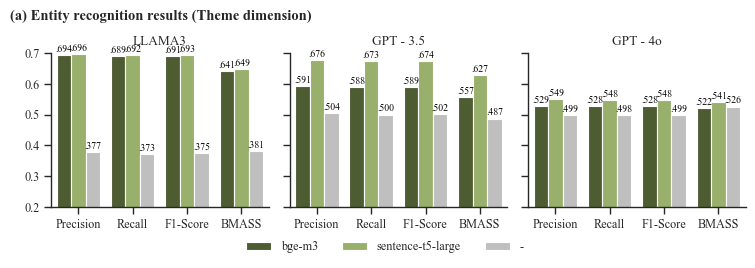

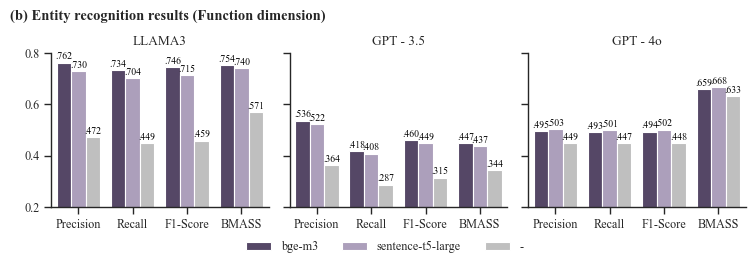

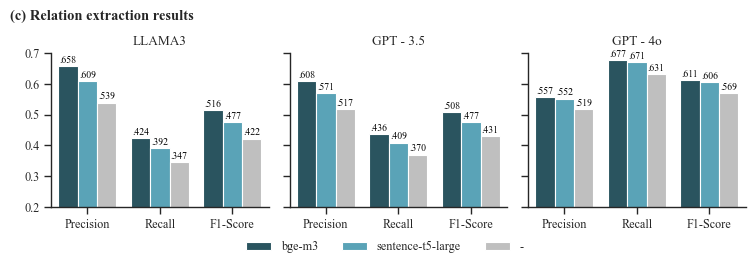

In [15]:
def plot_bar_entity(data, title, palettes):
    """
    Plot grouped bar charts (entity results), save as PDF.
    Args:
        data: DataFrame containing entity recognition results.
        title: Title of the figure.
        palettes: List of color palettes for each subplot.
    """
    # Fill missing values with '-'
    data = data.fillna('-')
    # Convert to long format for seaborn plotting
    data_long = data.melt(
        id_vars=["LLM", "SLM"],
        value_vars=["Precision", "Recall", "F1-Score", "BMASS"],
        var_name="Metric", value_name="Value"
    )

    # Get unique LLMs for subplots
    llms = data_long['LLM'].unique()
    n_llms = len(llms)
    # Create subplots for each LLM
    fig, axes = plt.subplots(nrows=1, ncols=n_llms, figsize=(2.5 * n_llms, 2.4), sharey=True)

    # Plot bars for each LLM
    for ax, llm, palette in zip(axes, llms, palettes):
        subset = data_long[data_long['LLM'] == llm]
        # Draw bar plot for current LLM
        bars = sns.barplot(
            data=subset,
            x='Metric', y='Value', hue='SLM', ax=ax,
            order=["Precision", "Recall", "F1-Score", "BMASS"],
            palette=palette
        )

        # Set y-axis range by title type
        if 'Theme' in title:
            yl = 0.7
        elif 'Function' in title:
            yl = 0.8
        ax.set_ylim(0.2, yl)

        # Set subplot title and axis labels
        ax.set_title(llm)
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Remove default legend
        ax.legend_.remove()

        # Annotate each bar with its value (no leading zero, 3 decimals)
        i = 0
        for container in ax.containers:
            labels = [f"{val:.3f}".lstrip('0') for val in container.datavalues]
            ax.bar_label(
                container, labels=labels, fontsize=7,
                color='black', padding=1
            )
            i += 1

    # Set overall figure title
    plt.suptitle(title, fontsize=10.5, x=0, ha='left', weight='bold')

    # Add legend below all subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels,
        bbox_to_anchor=(0.5, -0.08), loc='lower center',
        frameon=False, ncol=3
    )

    # Adjust layout and save figure
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    plt.savefig(os.path.join(input_path, title + '.pdf'), transparent=True, bbox_inches='tight')


def plot_bar_relation(data, title, palettes):
    """
    Plot grouped bar charts (relation results), save as PDF.
    Args:
        data: DataFrame containing relation extraction results.
        title: Title of the figure.
        palettes: List of color palettes for each subplot.
    """
    data = data.fillna('-')
    data_long = data.melt(
        id_vars=["LLM", "SLM"],
        value_vars=["Precision", "Recall", "F1-Score"],
        var_name="Metric", value_name="Value"
    )

    llms = data_long['LLM'].unique()
    n_llms = len(llms)
    fig, axes = plt.subplots(nrows=1, ncols=n_llms, figsize=(2.5 * n_llms, 2.4), sharey=True)

    for ax, llm, palette in zip(axes, llms, palettes):
        subset = data_long[data_long['LLM'] == llm]
        bars = sns.barplot(
            data=subset,
            x='Metric', y='Value', hue='SLM', ax=ax,
            order=["Precision", "Recall", "F1-Score"],
            palette=palette
        )

        ax.set_ylim(0.2, 0.7)
        ax.set_title(llm)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend_.remove()

        # Annotate each bar with its value (no leading zero, 3 decimals)
        i = 0
        for container in ax.containers:
            labels = [f"{val:.3f}".lstrip('0') for val in container.datavalues]
            ax.bar_label(
                container, labels=labels, fontsize=7,
                color='black', padding=1
            )
            i += 1

    plt.suptitle(title, fontsize=10.5, x=0, ha='left', weight='bold')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels,
        bbox_to_anchor=(0.5, -0.08), loc='lower center',
        frameon=False, ncol=3
    )

    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    plt.savefig(os.path.join(input_path, title + '.pdf'), transparent=True, bbox_inches='tight')


# Main code for reading data and plotting figures

input_path = './Figure 8'  # Relative path to data folder

# --- Entity recognition results (Theme dimension) ---
palettes1 = [['#50632B', '#9DBB61', '#BFBFBF']] * 3  # Color palette for each LLM
theme_result_data = pd.read_csv(os.path.join(input_path, 'theme_result.csv'))
plot_bar_entity(theme_result_data, '(a) Entity recognition results (Theme dimension)', palettes1)

# --- Entity recognition results (Function dimension) ---
palettes2 = [['#54426B', '#AB9AC0', '#BFBFBF']] * 3
func_result_data = pd.read_csv(os.path.join(input_path, 'function_result.csv'))
plot_bar_entity(func_result_data, '(b) Entity recognition results (Function dimension)', palettes2)

# --- Relation extraction results ---
palettes3 = [['#215968', '#4BACC6', '#BFBFBF']] * 3
relt_result_data = pd.read_csv(os.path.join(input_path, 'relation_result.csv'))
plot_bar_relation(relt_result_data, '(c) Relation extraction results', palettes3)

## Figure 10. Performance analysis under varying similarity threshold on precision, recall, and F1-score.

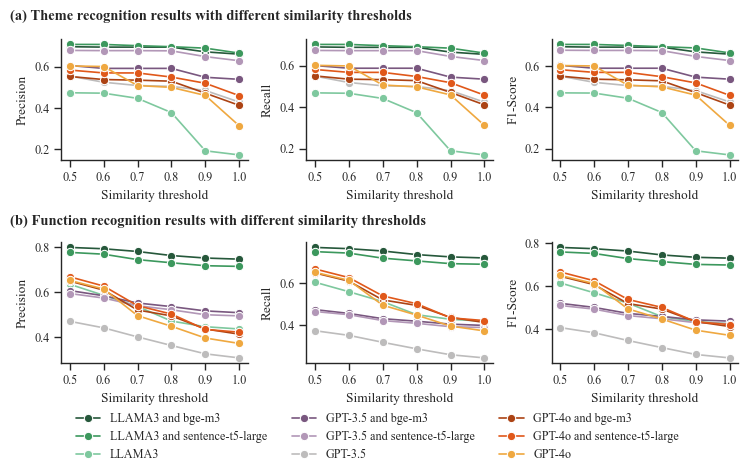

In [16]:
def plot_line(data_theme, data_func, title_theme, title_func):
    """
    Plot a grid of line charts for theme and function recognition,
    showing precision, recall, and F1-score vs. similarity threshold for each model.
    Args:
        data_theme: DataFrame for theme recognition results.
        data_func: DataFrame for function recognition results.
        title_theme: Title for theme subplot row.
        title_func: Title for function subplot row.
    """
    # Format data: extract threshold and model names
    data_theme['Similarity threshold'] = data_theme['Parameter'].str[-3:]
    data_theme['Model'] = data_theme['Model'].str.replace('+', ' and ')

    data_func['Similarity threshold'] = data_func['Parameter'].str[-3:]
    data_func['Model'] = data_func['Model'].str.replace('+', ' and ')

    # Create a figure with 2 rows (theme, function) and 3 columns (metrics)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(2.5 * 3, 3.8))

    # Plot for each row (theme/function) and each metric
    for row, entity in enumerate(['theme', 'func']):
        if entity == 'theme':
            data = data_theme
            title = title_theme
        elif entity == 'func':
            data = data_func
            title = title_func

        for index, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
            ax = axs[row, index]
            # Draw line plot for current metric and entity
            sns.lineplot(
                data=data, x='Similarity threshold', y=metric, hue='Model', ax=ax,
                markers=True,        # Enable markers
                marker='o',          # Specify marker style
                markersize=6,        # Set marker size
                hue_order=[
                    'LLAMA3 and bge-m3',
                    'LLAMA3 and sentence-t5-large',
                    'LLAMA3',
                    'GPT-3.5 and bge-m3',
                    'GPT-3.5 and sentence-t5-large',
                    'GPT-3.5',
                    'GPT-4o and bge-m3',
                    'GPT-4o and sentence-t5-large',
                    'GPT-4o'
                ],
                palette=[
                    '#26583B', '#3C985D', '#7EC89E',
                    '#79577F', '#B297B7', '#BDBCBC',
                    '#AC4314', '#E0581A', '#EFA840'
                ]
            )
            # Remove subplot title and set axis labels
            ax.set_title('')
            ax.set_xlabel('Similarity threshold')
            ax.set_ylabel(metric)
            # Remove default legend
            ax.legend_.remove()

    # Add overall row titles to the figure
    fig.text(0.01, 1.05, title_theme, ha='left', fontsize=10.5, weight='bold')
    fig.text(0.01, 0.51, title_func, ha='left', fontsize=10.5, weight='bold')

    # Add a shared legend below the plots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles, labels,
        bbox_to_anchor=(0.5, -0.14), loc='lower center',
        frameon=False,
        ncol=3
    )

    # Adjust layout and row spacing
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=1, hspace=0.67)  # Increase hspace for more space between rows
    # Save figure as SVG in the input_path directory
    plt.savefig(os.path.join(input_path, 'Parameter Sensitivity Analysis.pdf'), transparent=True, bbox_inches='tight')

# Main code: read data and plot
input_path = r'./Figure 10'  # Relative path to data folder
theme_params_data = pd.read_csv(os.path.join(input_path, 'theme.csv'))
func_params_data = pd.read_csv(os.path.join(input_path, 'function.csv'))
plot_line(
    theme_params_data, func_params_data,
    '(a) Theme recognition results with different similarity thresholds',
    '(b) Function recognition results with different similarity thresholds'
)